In [1]:
# conda activate r_env
# path to cellranger-outs and to save QCed object
path2outs_old = '/nfs/team205/heart/mapped/cellranger-arc101/'
path2outs_new = '/nfs/team205/heart/mapped/cellranger-arc200/'

## Import libraries

In [13]:
library(Signac)
library(Seurat)
library(EnsDb.Hsapiens.v86)
library(BSgenome.Hsapiens.UCSC.hg38)

set.seed(1234)
library(tidyverse)
library(patchwork)

## Read metadata

In [3]:
# metadata = read.csv('/nfs/team205/kk18/data/cellatac/tic-1050/6reg-v2_Multiome_metadata.csv',row.names=1)
metadata = read.csv('/nfs/team205/heart/metadata/multiome_metadata_6reg_plus_SAN.csv')
head(metadata)

Combined_SangerID                     SangerID           Foetal_or_Adult
1 HCAHeartST10773165_HCAHeartST10781062 HCAHeartST10773165 Adult          
2 HCAHeartST10773166_HCAHeartST10781063 HCAHeartST10773166 Adult          
3 HCAHeartST10773167_HCAHeartST10781064 HCAHeartST10773167 Adult          
4 HCAHeartST10773168_HCAHeartST10781065 HCAHeartST10773168 Adult          
5 HCAHeartST10773169_HCAHeartST10781446 HCAHeartST10773169 Adult          
6 HCAHeartST10773170_HCAHeartST10781447 HCAHeartST10773170 Adult          
  Protocol Donor Region_Fine       Region_Coarse Gender Age   Type
1 RNA      AH1   LV FW ANTLAT EPI  LV            Female 45-50 DCD 
2 RNA      AH1   LV FW ANTLAT ENDO LV            Female 45-50 DCD 
3 RNA      AH1   RV FW EPI         RV            Female 45-50 DCD 
4 RNA      AH1   RV FW ENDO        RV            Female 45-50 DCD 
5 RNA      AH1   RAA               RA            Female 45-50 DCD 
6 RNA      AH1   SAN               SAN           Female 45-50 DCD 
  cellbender_out                                                                    
1 /nfs/team205/heart/soupremoved/cellbender020/HCAHeartST10773165_HCAHeartST10781062
2 /nfs/team205/heart/soupremoved/cellbender020/HCAHeartST10773166_HCAHeartST10781063
3 /nfs/team205/heart/soupremoved/cellbender020/HCAHeartST10773167_HCAHeartST10781064
4 /nfs/team205/heart/soupremoved/cellbender020/HCAHeartST10773168_HCAHeartST10781065
5 /nfs/team205/heart/soupremoved/cellbender020/HCAHeartST10773169_HCAHeartST10781446
6 /nfs/team205/heart/soupremoved/cellbender020/HCAHeartST10773170_HCAHeartST10781447

In [4]:
sample_ids_old = metadata %>% filter(Protocol=='ATAC', is.na(Region_Fine)) %>% pull(SangerID)
sample_ids_new = metadata %>% filter(Protocol=='ATAC', !is.na(Region_Fine)) %>% pull(Combined_SangerID)
SangerIDs <- c(sample_ids_old, sample_ids_new)
paths <- c(paste0(path2outs_old, sample_ids_old), paste0(path2outs_new, sample_ids_new))

In [5]:
paths

[1] "/nfs/team205/heart/mapped/cellranger-arc101/HCAHeart9508819"                      
 [2] "/nfs/team205/heart/mapped/cellranger-arc101/HCAHeart9508820"                      
 [3] "/nfs/team205/heart/mapped/cellranger-arc101/HCAHeart9508821"                      
 [4] "/nfs/team205/heart/mapped/cellranger-arc101/HCAHeart9917173"                      
 [5] "/nfs/team205/heart/mapped/cellranger-arc101/HCAHeart9917174"                      
 [6] "/nfs/team205/heart/mapped/cellranger-arc101/HCAHeart9917175"                      
 [7] "/nfs/team205/heart/mapped/cellranger-arc101/HCAHeart9917176"                      
 [8] "/nfs/team205/heart/mapped/cellranger-arc101/HCAHeart9917177"                      
 [9] "/nfs/team205/heart/mapped/cellranger-arc101/HCAHeart9917178"                      
[10] "/nfs/team205/heart/mapped/cellranger-arc200/HCAHeartST10773165_HCAHeartST10781062"
[11] "/nfs/team205/heart/mapped/cellranger-arc200/HCAHeartST10773166_HCAHeartST10781063"
[12] "/nfs/team205/heart/mapped/cellranger-arc200/HCAHeartST10773167_HCAHeartST10781064"
[13] "/nfs/team205/heart/mapped/cellranger-arc200/HCAHeartST10773168_HCAHeartST10781065"
[14] "/nfs/team205/heart/mapped/cellranger-arc200/HCAHeartST10773169_HCAHeartST10781446"
[15] "/nfs/team205/heart/mapped/cellranger-arc200/HCAHeartST10773170_HCAHeartST10781447"
[16] "/nfs/team205/heart/mapped/cellranger-arc200/HCAHeartST10773171_HCAHeartST10781448"

## Signac workflow for Multiome

ref: https://satijalab.org/signac/articles/pbmc_multiomic.html

In [6]:
# get gene annotations for hg38
annotation <- GetGRangesFromEnsDb(ensdb = EnsDb.Hsapiens.v86)

Fetching data...
OK

Parsing exons...
OK
Defining introns...
OK
Defining UTRs...
OK
Defining CDS...
OK

aggregating...

Done

Fetching data...
OK

Parsing exons...
OK
Defining introns...
OK
Defining UTRs...
OK
Defining CDS...
OK

aggregating...

Done

Fetching data...
OK

Parsing exons...
OK
Defining introns...
OK
Defining UTRs...
OK
Defining CDS...
OK

aggregating...

Done

Fetching data...
OK

Parsing exons...
OK
Defining introns...
OK
Defining UTRs...
OK
Defining CDS...
OK

aggregating...

Done

Fetching data...
OK

Parsing exons...
OK
Defining introns...
OK
Defining UTRs...
OK
Defining CDS...
OK

aggregating...

Done

Fetching data...
OK

Parsing exons...
OK
Defining introns...
OK
Defining UTRs...
OK
Defining CDS...
OK

aggregating...

Done

Fetching data...
OK

Parsing exons...
OK
Defining introns...
OK
Defining UTRs...
OK
Defining CDS...
OK

aggregating...

Done

Fetching data...
OK

Parsing exons...
OK
Defining introns...
OK
Defining UTRs...
OK
Defining CDS...
OK

aggregating...

In [7]:
genome(annotation) <- "hg38"
# seqlevelsStyle(annotation) <- "UCSC"

In [8]:
chr_names <- seqlevels(annotation)
seqlevels(annotation) <- paste0('chr', chr_names)

In [9]:
mainDir = '/lustre/scratch117/cellgen/team205/dm19/kazu/heart/mapped'

In [10]:
for(id in 1:length(paths)){
    path = paths[id]
    ID = SangerIDs[id]
    
    print(path)
    print(ID)
    
    # load the RNA and ATAC data
    counts <- Read10X_h5(paste0(path, '/filtered_feature_bc_matrix.h5'))
    fragpath <- paste0(path, '/atac_fragments.tsv.gz')
    
    # create a Seurat object containing the RNA adata
    so <- CreateSeuratObject(
        counts = counts$`Gene Expression`,
        assay = "RNA"
    )
    
    # create ATAC assay and add it to the object
    so[["ATAC"]] <- CreateChromatinAssay(
        counts = counts$Peaks,
        sep = c(":", "-"),
        fragments = fragpath,
        annotation = annotation
    )
    
    print(dim(so))
    print(dim(so[["ATAC"]]))
          
    print('QCing')
    DefaultAssay(so) <- "ATAC"
    so <- NucleosomeSignal(so)
    so <- TSSEnrichment(so)
          
    
    path_out = file.path(mainDir, ID)
    if (!file.exists(path_out)){
        dir.create(path_out)
        saveRDS(so, paste0(path_out,'/',ID,'_SeuratObj_QCed_6reg_plus_SAN.RDS'))
    }
  
    rm(so)      
}

[1] "/nfs/team205/heart/mapped/cellranger-arc101/HCAHeart9508819"
[1] "HCAHeart9508819"


Warning message in sparseMatrix(i = indices[] + 1, p = indptr[], x = as.numeric(x = counts[]), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Genome matrix has multiple modalities, returning a list of matrices for this genome

Computing hash



[1] 36601  3510
[1] 126052   3510
[1] "QCing"


Extracting TSS positions

Extracting fragments at TSSs


Computing TSS enrichment score



[1] "/nfs/team205/heart/mapped/cellranger-arc101/HCAHeart9508820"
[1] "HCAHeart9508820"


Warning message in sparseMatrix(i = indices[] + 1, p = indptr[], x = as.numeric(x = counts[]), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Genome matrix has multiple modalities, returning a list of matrices for this genome

Computing hash



[1] 36601 11684
[1] 47014 11684
[1] "QCing"


Extracting TSS positions

Extracting fragments at TSSs


Computing TSS enrichment score



[1] "/nfs/team205/heart/mapped/cellranger-arc101/HCAHeart9508821"
[1] "HCAHeart9508821"


Warning message in sparseMatrix(i = indices[] + 1, p = indptr[], x = as.numeric(x = counts[]), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Genome matrix has multiple modalities, returning a list of matrices for this genome

Computing hash



[1] 36601 10170
[1] 79543 10170
[1] "QCing"


Extracting TSS positions

Extracting fragments at TSSs


Computing TSS enrichment score



[1] "/nfs/team205/heart/mapped/cellranger-arc101/HCAHeart9917173"
[1] "HCAHeart9917173"


Warning message in sparseMatrix(i = indices[] + 1, p = indptr[], x = as.numeric(x = counts[]), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Genome matrix has multiple modalities, returning a list of matrices for this genome

Computing hash



[1] 36601  5740
[1] 34208  5740
[1] "QCing"


Extracting TSS positions

Extracting fragments at TSSs


Computing TSS enrichment score



[1] "/nfs/team205/heart/mapped/cellranger-arc101/HCAHeart9917174"
[1] "HCAHeart9917174"


Warning message in sparseMatrix(i = indices[] + 1, p = indptr[], x = as.numeric(x = counts[]), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Genome matrix has multiple modalities, returning a list of matrices for this genome

Computing hash



[1] 36601  2392
[1] 20819  2392
[1] "QCing"


Extracting TSS positions

Extracting fragments at TSSs


Computing TSS enrichment score



[1] "/nfs/team205/heart/mapped/cellranger-arc101/HCAHeart9917175"
[1] "HCAHeart9917175"


Warning message in sparseMatrix(i = indices[] + 1, p = indptr[], x = as.numeric(x = counts[]), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Genome matrix has multiple modalities, returning a list of matrices for this genome

Computing hash



[1] 36601  4560
[1] 46286  4560
[1] "QCing"


Extracting TSS positions

Extracting fragments at TSSs


Computing TSS enrichment score



[1] "/nfs/team205/heart/mapped/cellranger-arc101/HCAHeart9917176"
[1] "HCAHeart9917176"


Warning message in sparseMatrix(i = indices[] + 1, p = indptr[], x = as.numeric(x = counts[]), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Genome matrix has multiple modalities, returning a list of matrices for this genome

Computing hash



[1] 36601  5195
[1] 34804  5195
[1] "QCing"


Extracting TSS positions

Extracting fragments at TSSs


Computing TSS enrichment score



[1] "/nfs/team205/heart/mapped/cellranger-arc101/HCAHeart9917177"
[1] "HCAHeart9917177"


Warning message in sparseMatrix(i = indices[] + 1, p = indptr[], x = as.numeric(x = counts[]), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Genome matrix has multiple modalities, returning a list of matrices for this genome

Computing hash



[1] 36601  5932
[1] 44400  5932
[1] "QCing"


Extracting TSS positions

Extracting fragments at TSSs


Computing TSS enrichment score



[1] "/nfs/team205/heart/mapped/cellranger-arc101/HCAHeart9917178"
[1] "HCAHeart9917178"


Warning message in sparseMatrix(i = indices[] + 1, p = indptr[], x = as.numeric(x = counts[]), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Genome matrix has multiple modalities, returning a list of matrices for this genome

Computing hash



[1] 36601  5473
[1] 40219  5473
[1] "QCing"


Extracting TSS positions

Extracting fragments at TSSs


Computing TSS enrichment score



[1] "/nfs/team205/heart/mapped/cellranger-arc200/HCAHeartST10773165_HCAHeartST10781062"
[1] "HCAHeartST10773165_HCAHeartST10781062"


Warning message in sparseMatrix(i = indices[] + 1, p = indptr[], x = as.numeric(x = counts[]), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Genome matrix has multiple modalities, returning a list of matrices for this genome

Computing hash



[1] 36601  5573
[1] 117405   5573
[1] "QCing"


Extracting TSS positions

Extracting fragments at TSSs


Computing TSS enrichment score



[1] "/nfs/team205/heart/mapped/cellranger-arc200/HCAHeartST10773166_HCAHeartST10781063"
[1] "HCAHeartST10773166_HCAHeartST10781063"


Warning message in sparseMatrix(i = indices[] + 1, p = indptr[], x = as.numeric(x = counts[]), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Genome matrix has multiple modalities, returning a list of matrices for this genome

Computing hash



[1] 36601 12191
[1] 132319  12191
[1] "QCing"


Extracting TSS positions

Extracting fragments at TSSs


Computing TSS enrichment score



[1] "/nfs/team205/heart/mapped/cellranger-arc200/HCAHeartST10773167_HCAHeartST10781064"
[1] "HCAHeartST10773167_HCAHeartST10781064"


Warning message in sparseMatrix(i = indices[] + 1, p = indptr[], x = as.numeric(x = counts[]), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Genome matrix has multiple modalities, returning a list of matrices for this genome

Computing hash



[1] 36601  5510
[1] 92287  5510
[1] "QCing"


Extracting TSS positions

Extracting fragments at TSSs


Computing TSS enrichment score



[1] "/nfs/team205/heart/mapped/cellranger-arc200/HCAHeartST10773168_HCAHeartST10781065"
[1] "HCAHeartST10773168_HCAHeartST10781065"


Warning message in sparseMatrix(i = indices[] + 1, p = indptr[], x = as.numeric(x = counts[]), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Genome matrix has multiple modalities, returning a list of matrices for this genome

Computing hash



[1] 36601 10616
[1] 129275  10616
[1] "QCing"


Extracting TSS positions

Extracting fragments at TSSs


Computing TSS enrichment score



[1] "/nfs/team205/heart/mapped/cellranger-arc200/HCAHeartST10773169_HCAHeartST10781446"
[1] "HCAHeartST10773169_HCAHeartST10781446"


Warning message in sparseMatrix(i = indices[] + 1, p = indptr[], x = as.numeric(x = counts[]), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Genome matrix has multiple modalities, returning a list of matrices for this genome

Computing hash



[1] 36601  1943
[1] 58534  1943
[1] "QCing"


Extracting TSS positions

Extracting fragments at TSSs


Computing TSS enrichment score



[1] "/nfs/team205/heart/mapped/cellranger-arc200/HCAHeartST10773170_HCAHeartST10781447"
[1] "HCAHeartST10773170_HCAHeartST10781447"


Warning message in sparseMatrix(i = indices[] + 1, p = indptr[], x = as.numeric(x = counts[]), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Genome matrix has multiple modalities, returning a list of matrices for this genome

Computing hash



[1] 36601  9432
[1] 67301  9432
[1] "QCing"


Extracting TSS positions

Extracting fragments at TSSs


Computing TSS enrichment score



[1] "/nfs/team205/heart/mapped/cellranger-arc200/HCAHeartST10773171_HCAHeartST10781448"
[1] "HCAHeartST10773171_HCAHeartST10781448"


Warning message in sparseMatrix(i = indices[] + 1, p = indptr[], x = as.numeric(x = counts[]), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"
Genome matrix has multiple modalities, returning a list of matrices for this genome

Computing hash



[1] 36601 20000
[1] 75837 20000
[1] "QCing"


Extracting TSS positions

Extracting fragments at TSSs


Computing TSS enrichment score



## QC visualisation

[1] "/nfs/team205/heart/mapped/cellranger-arc101/HCAHeart9508819"
[1] "HCAHeart9508819"
[1] "/nfs/team205/heart/mapped/cellranger-arc101/HCAHeart9508820"
[1] "HCAHeart9508820"


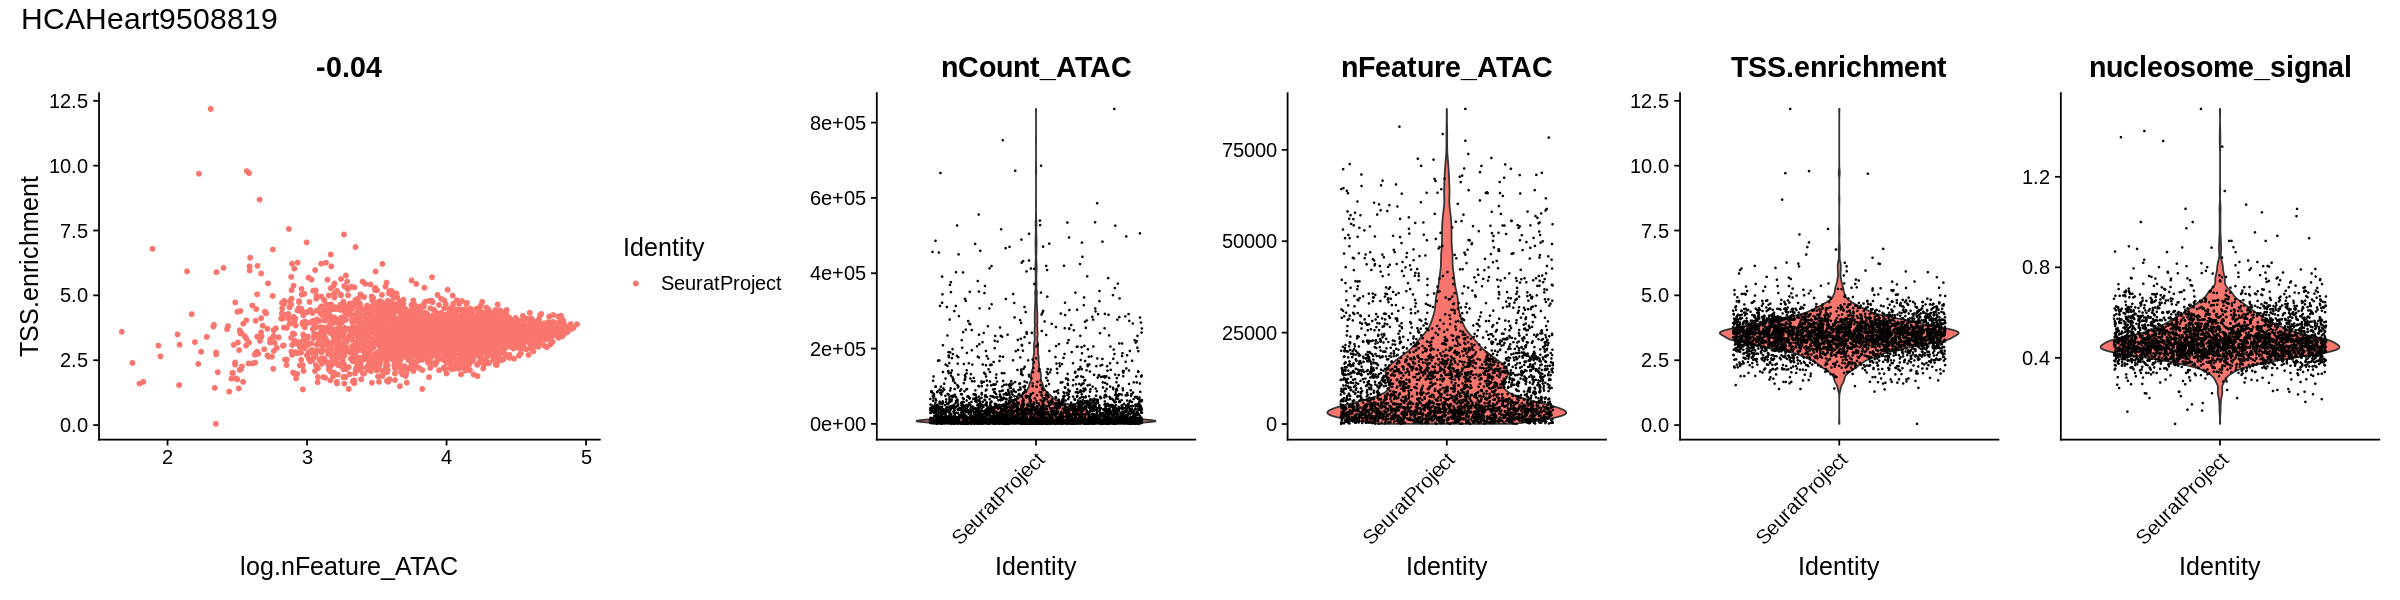

[1] "/nfs/team205/heart/mapped/cellranger-arc101/HCAHeart9508821"
[1] "HCAHeart9508821"


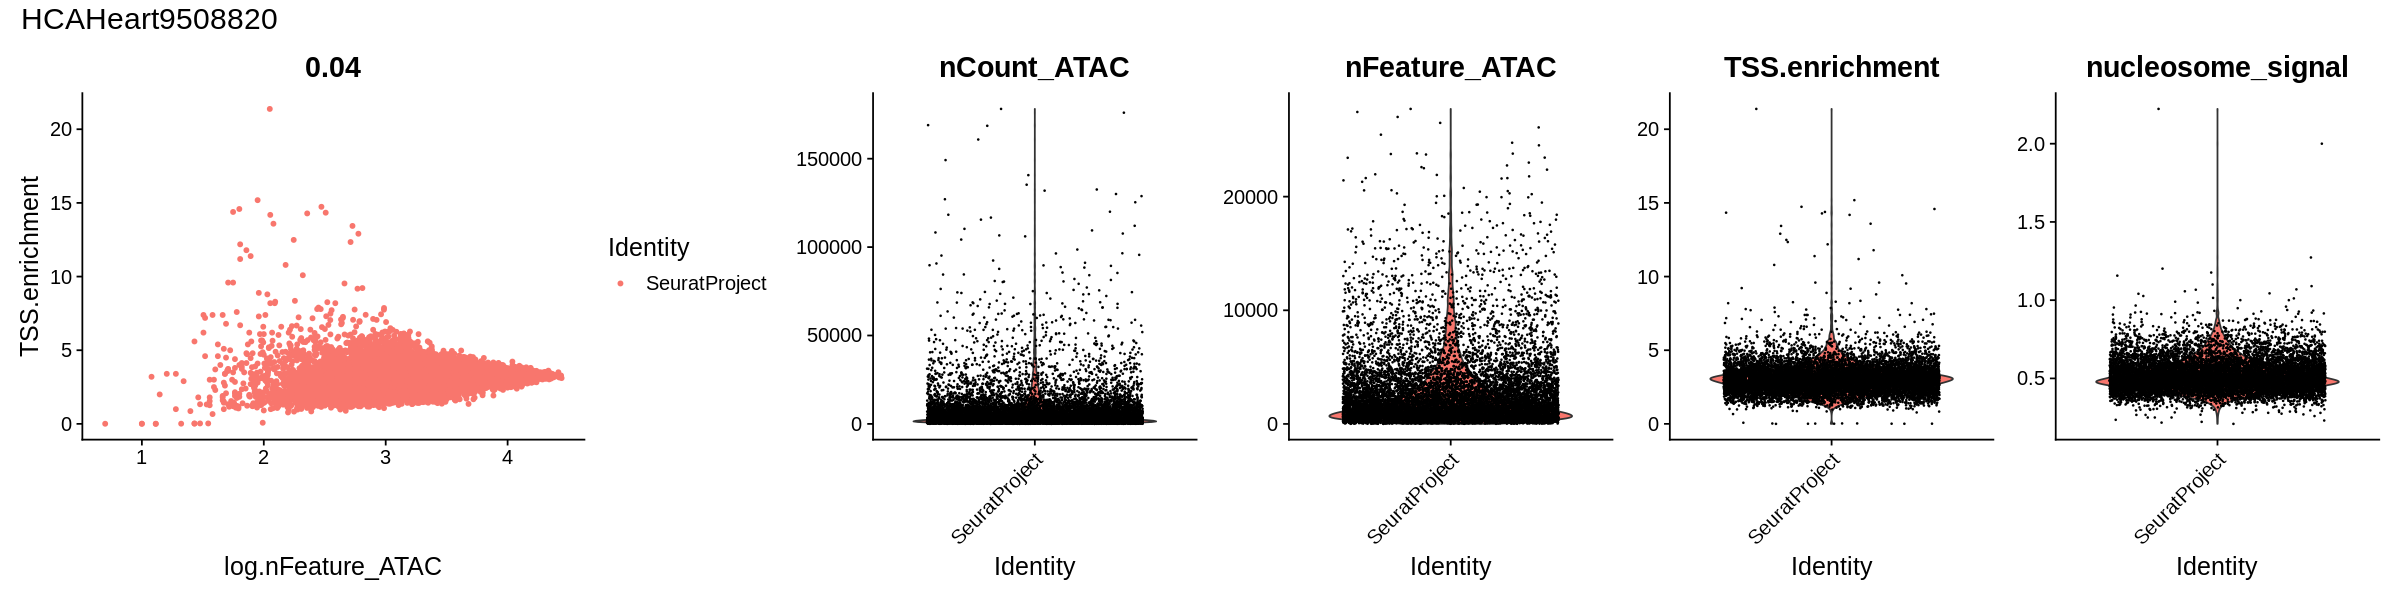

[1] "/nfs/team205/heart/mapped/cellranger-arc101/HCAHeart9917173"
[1] "HCAHeart9917173"


Warning message:
"Removed 7 rows containing non-finite values (stat_ydensity)."
Warning message:
"Removed 7 rows containing missing values (geom_point)."


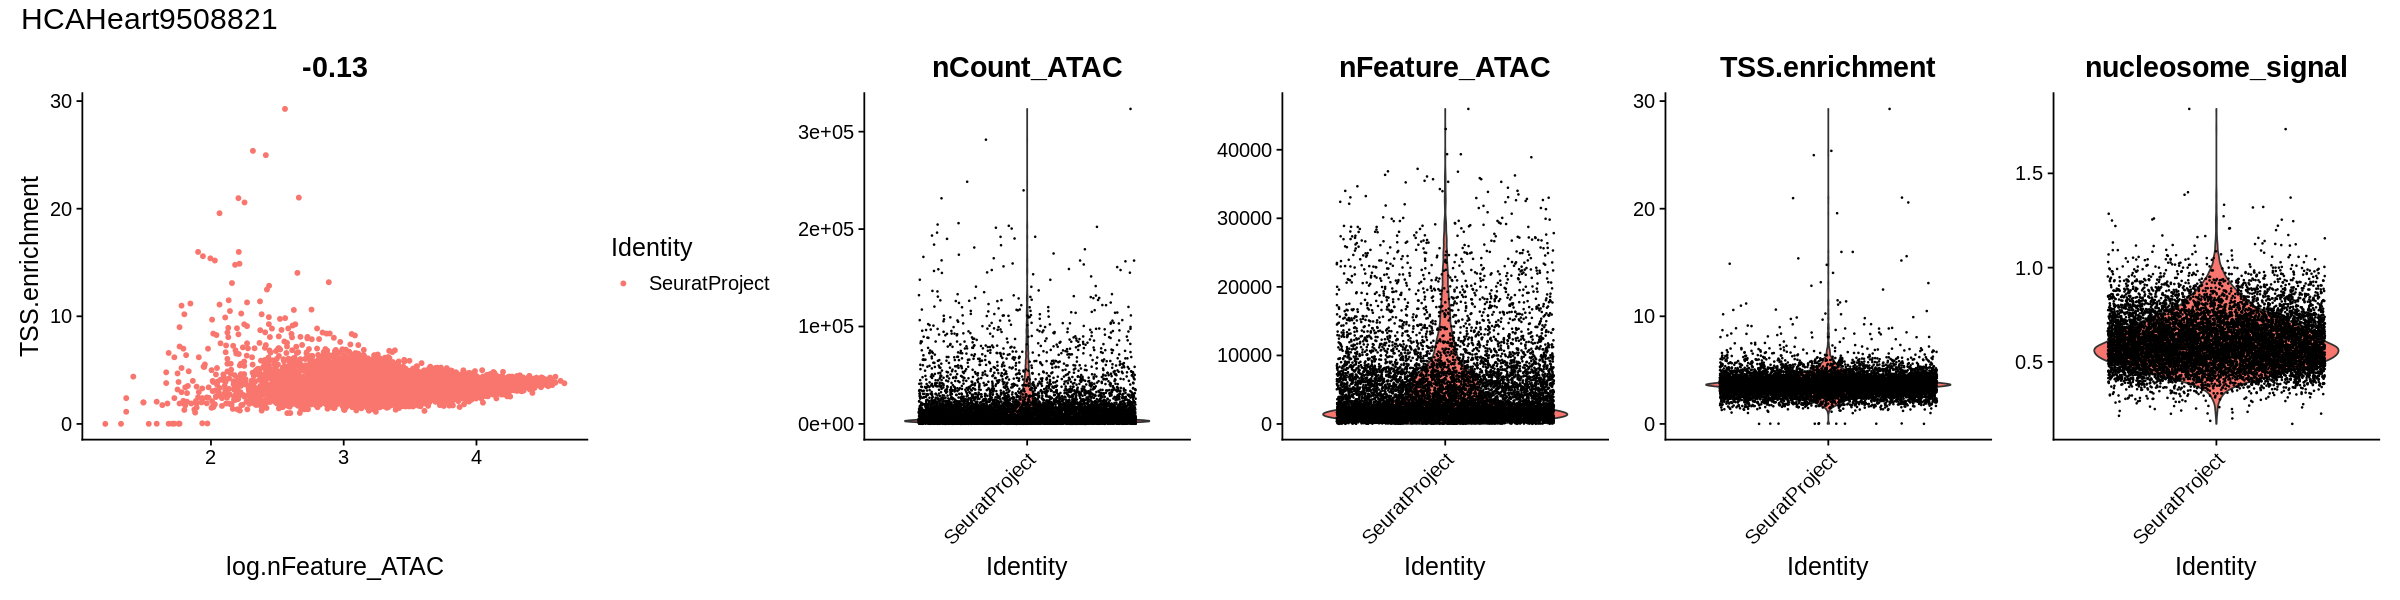

[1] "/nfs/team205/heart/mapped/cellranger-arc101/HCAHeart9917174"
[1] "HCAHeart9917174"


Warning message:
"Removed 3 rows containing non-finite values (stat_ydensity)."
Warning message:
"Removed 3 rows containing missing values (geom_point)."


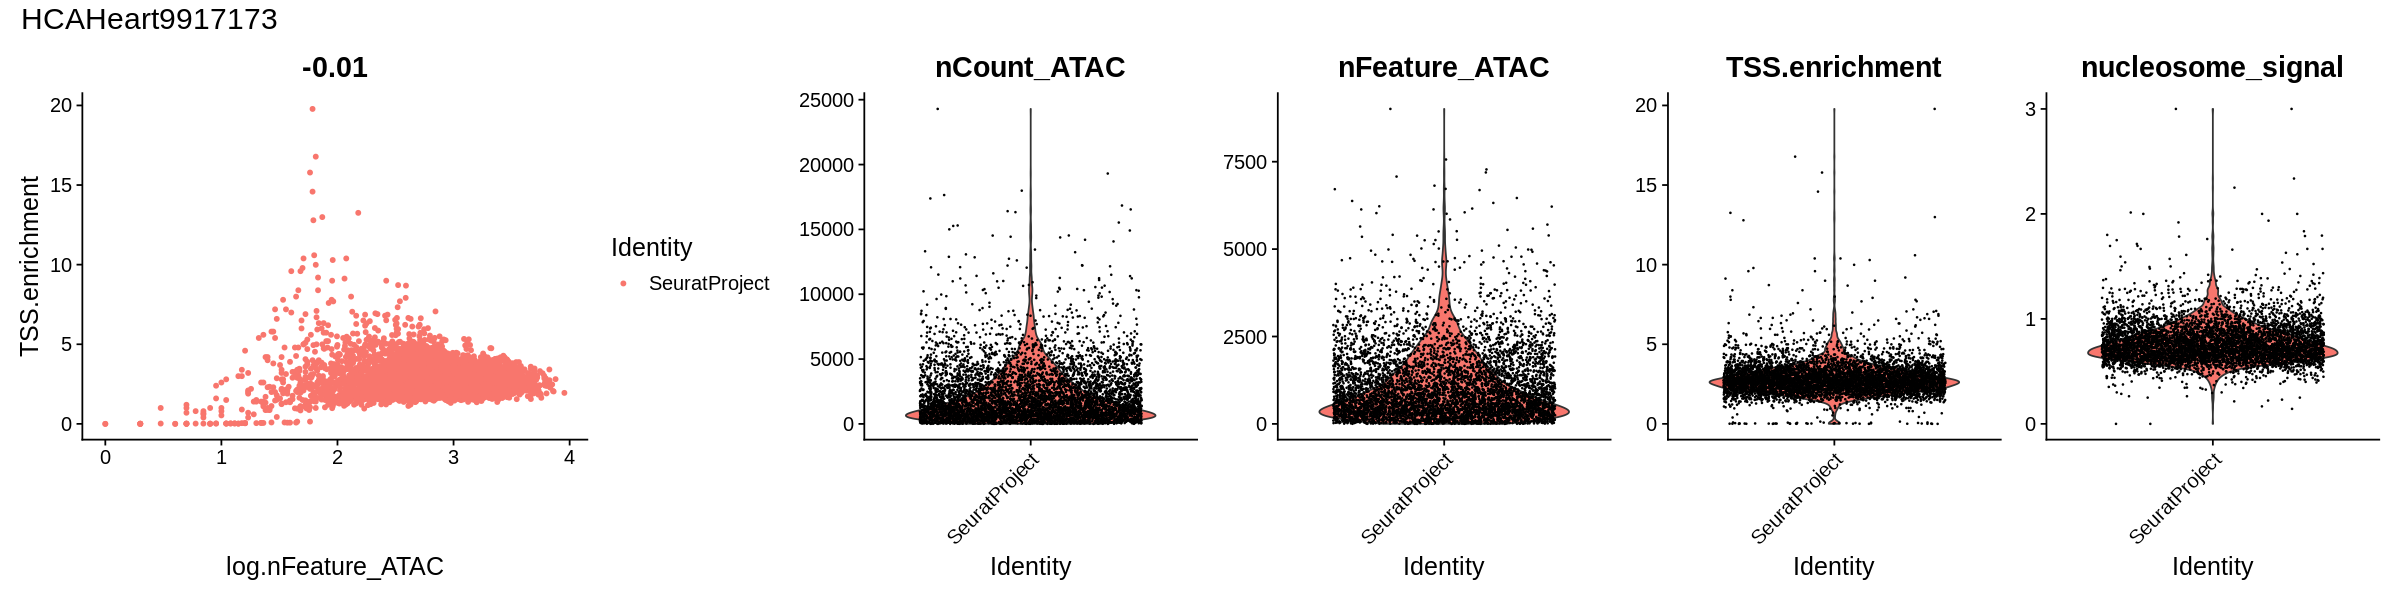

[1] "/nfs/team205/heart/mapped/cellranger-arc101/HCAHeart9917175"
[1] "HCAHeart9917175"


Warning message:
"Removed 1 rows containing non-finite values (stat_ydensity)."
Warning message:
"Removed 1 rows containing missing values (geom_point)."


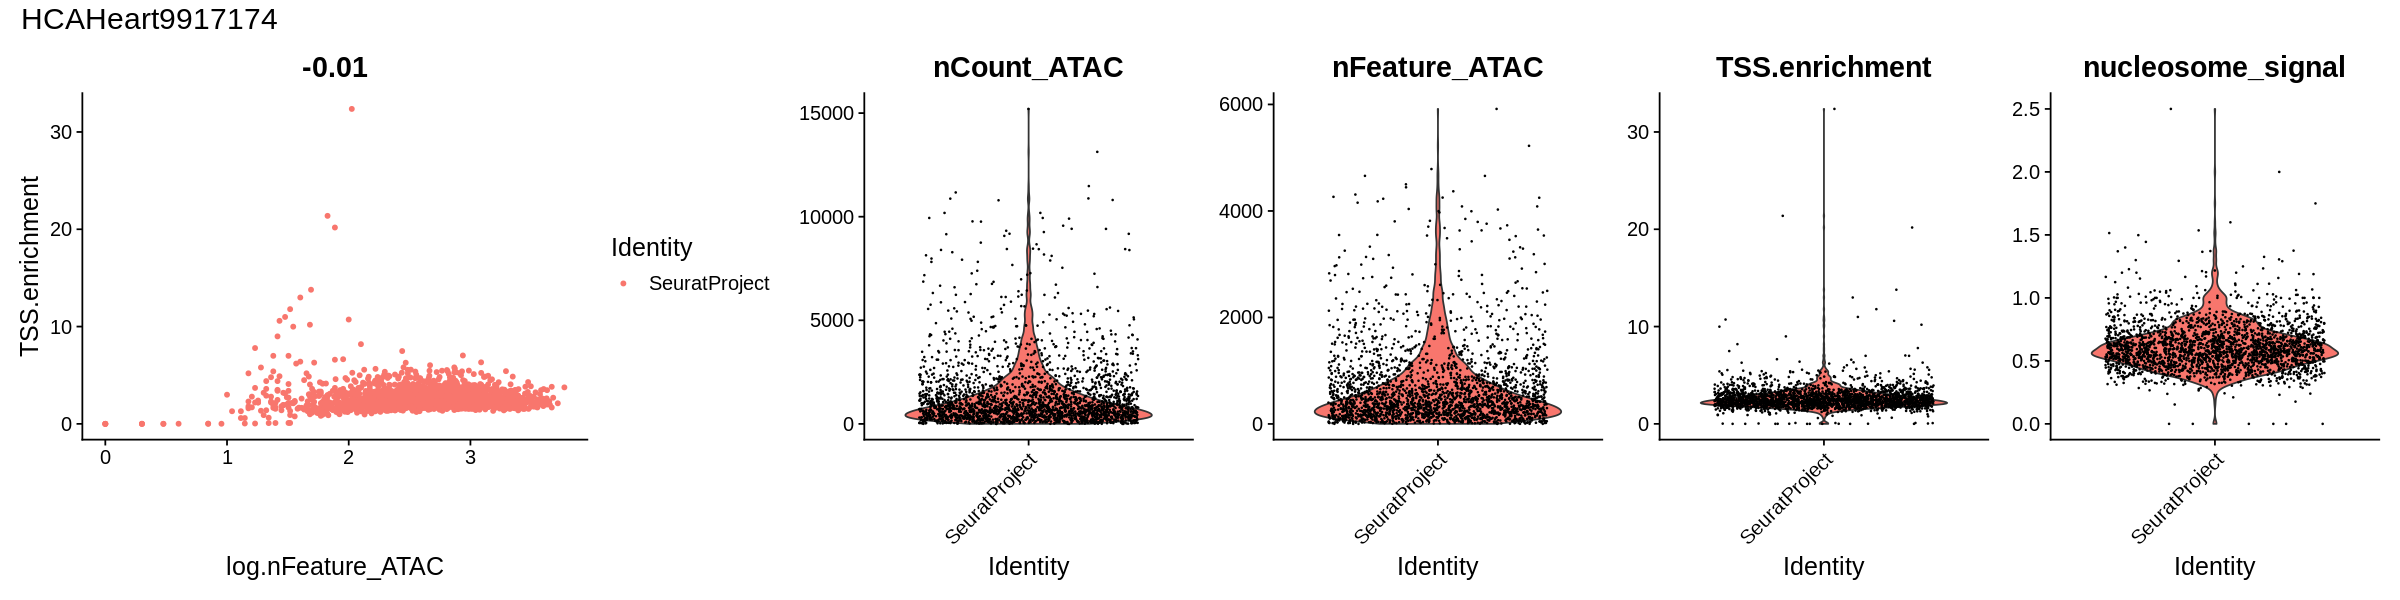

[1] "/nfs/team205/heart/mapped/cellranger-arc101/HCAHeart9917176"
[1] "HCAHeart9917176"


Warning message:
"Removed 7 rows containing non-finite values (stat_ydensity)."
Warning message:
"Removed 7 rows containing missing values (geom_point)."


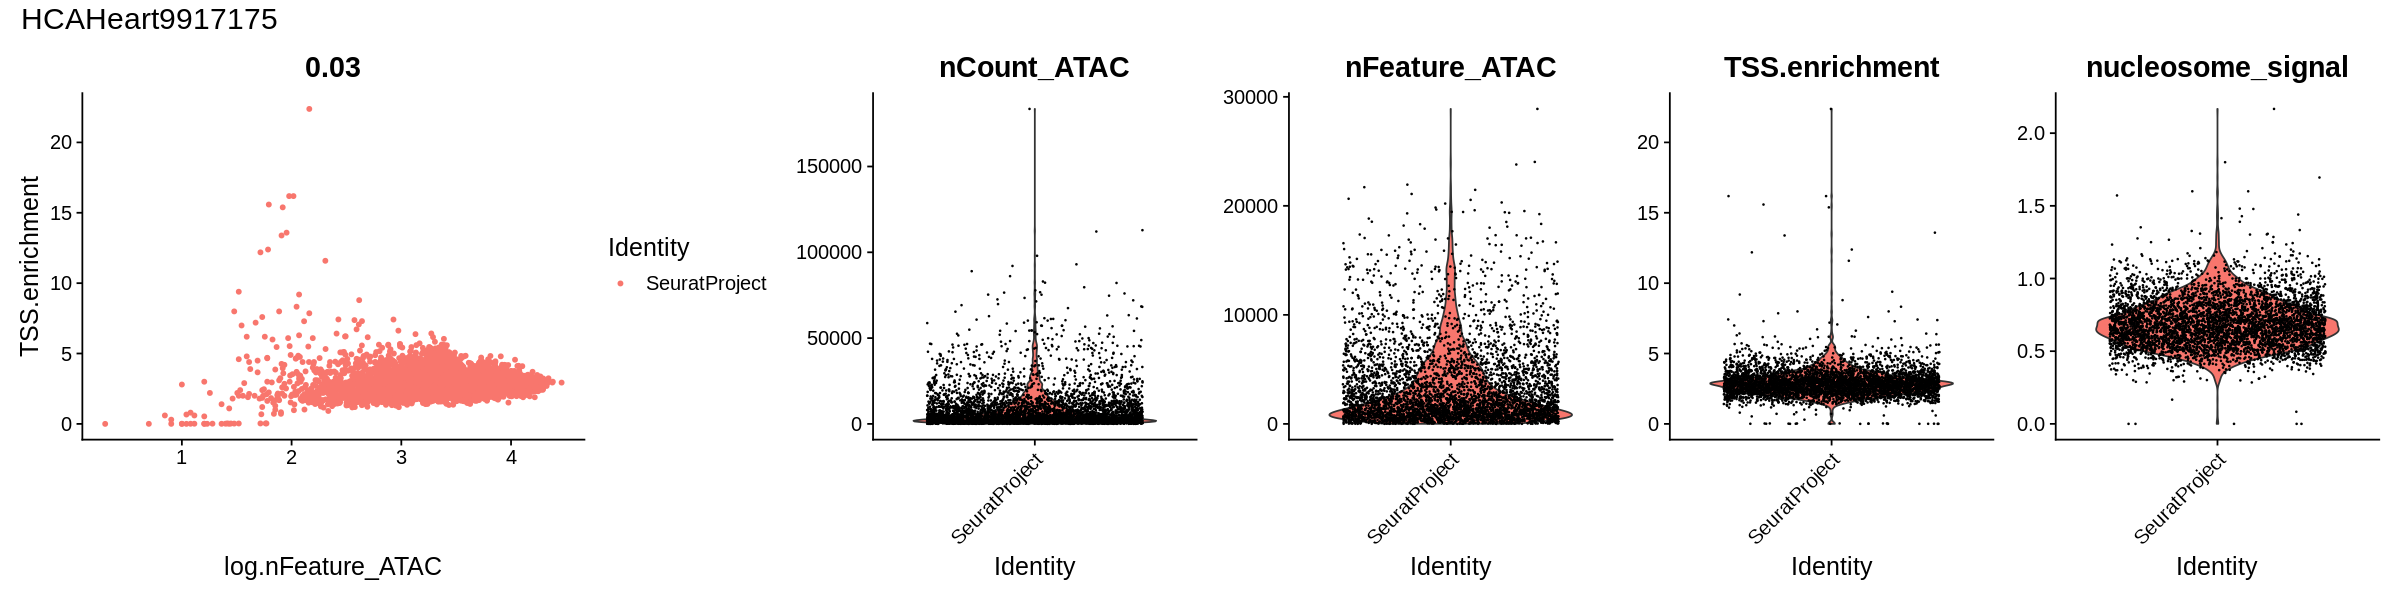

[1] "/nfs/team205/heart/mapped/cellranger-arc101/HCAHeart9917177"
[1] "HCAHeart9917177"


Warning message:
"Removed 2 rows containing non-finite values (stat_ydensity)."
Warning message:
"Removed 2 rows containing missing values (geom_point)."


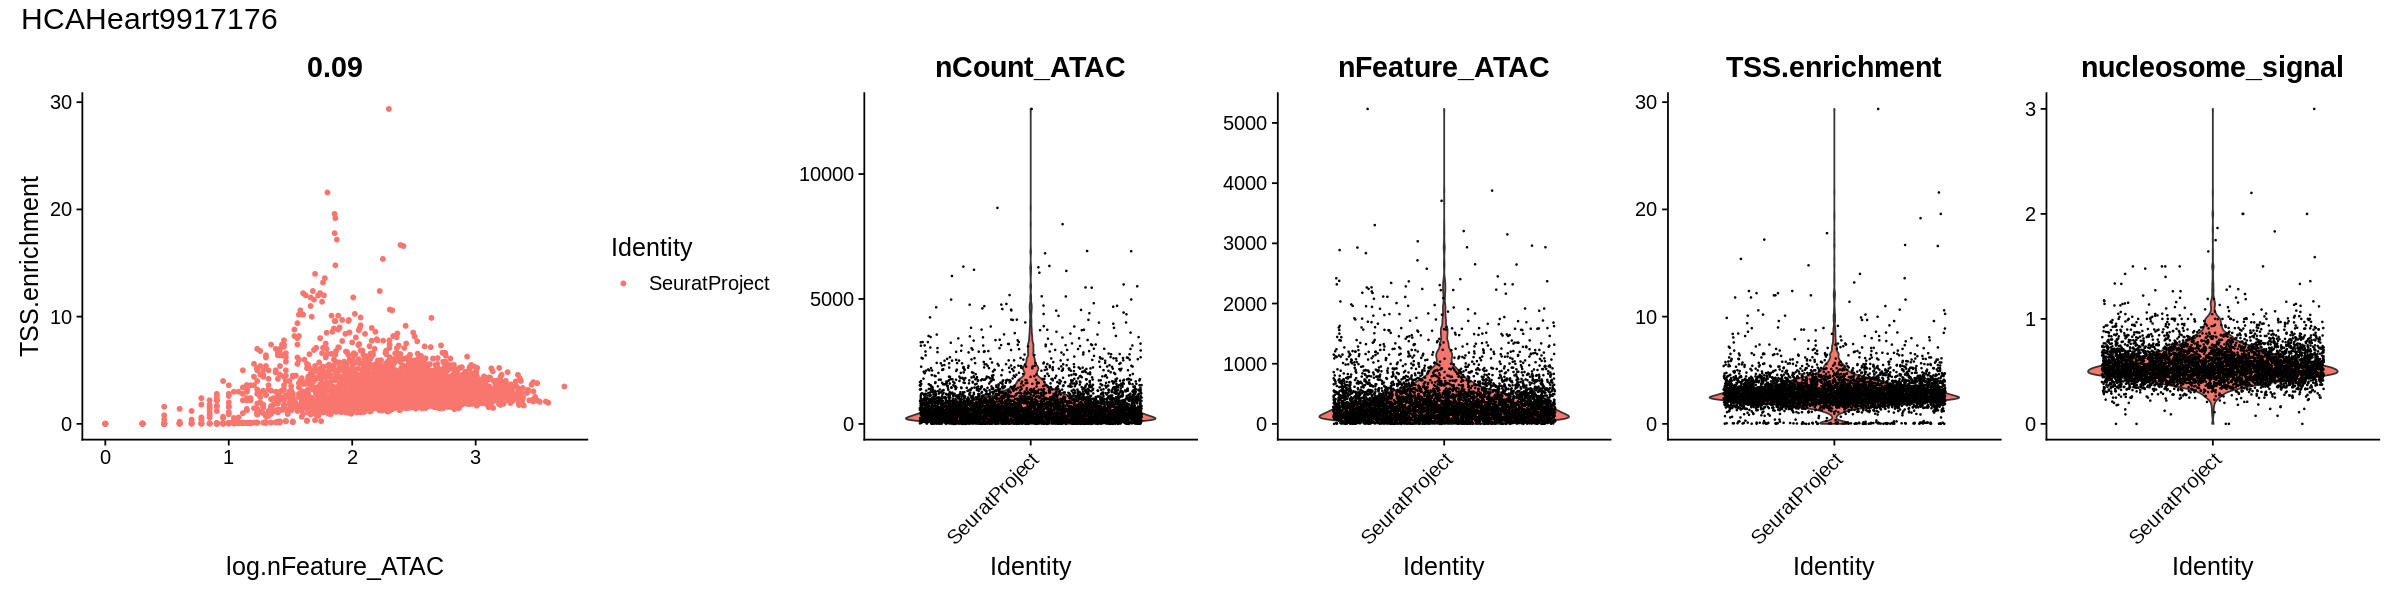

[1] "/nfs/team205/heart/mapped/cellranger-arc101/HCAHeart9917178"
[1] "HCAHeart9917178"


Warning message:
"Removed 2 rows containing non-finite values (stat_ydensity)."
Warning message:
"Removed 2 rows containing missing values (geom_point)."


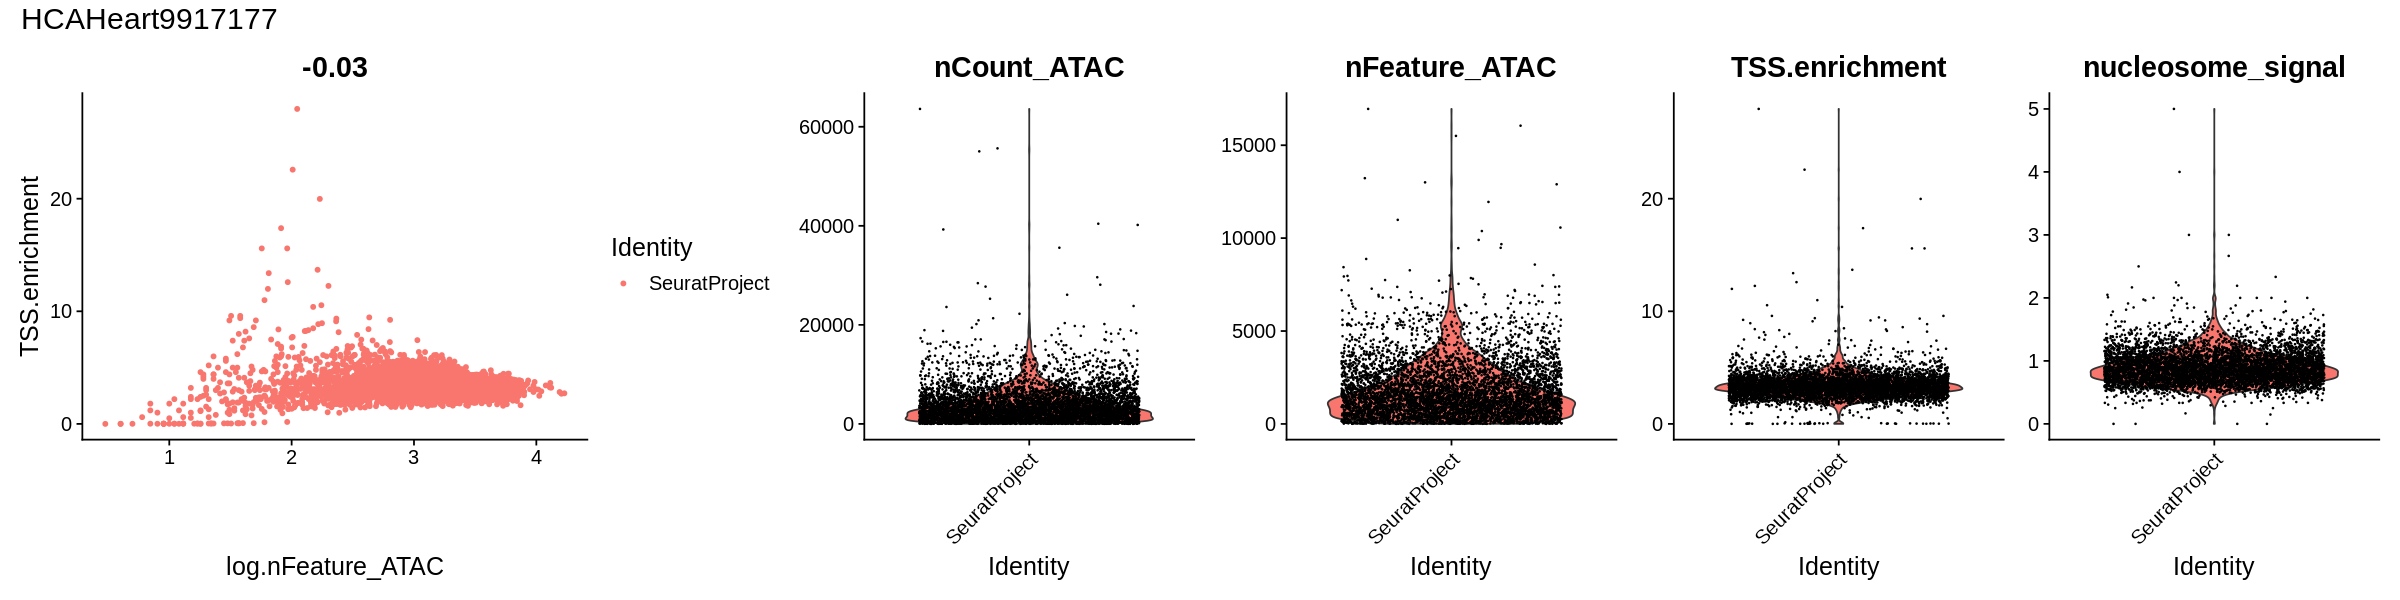

[1] "/nfs/team205/heart/mapped/cellranger-arc200/HCAHeartST10773165_HCAHeartST10781062"
[1] "HCAHeartST10773165_HCAHeartST10781062"


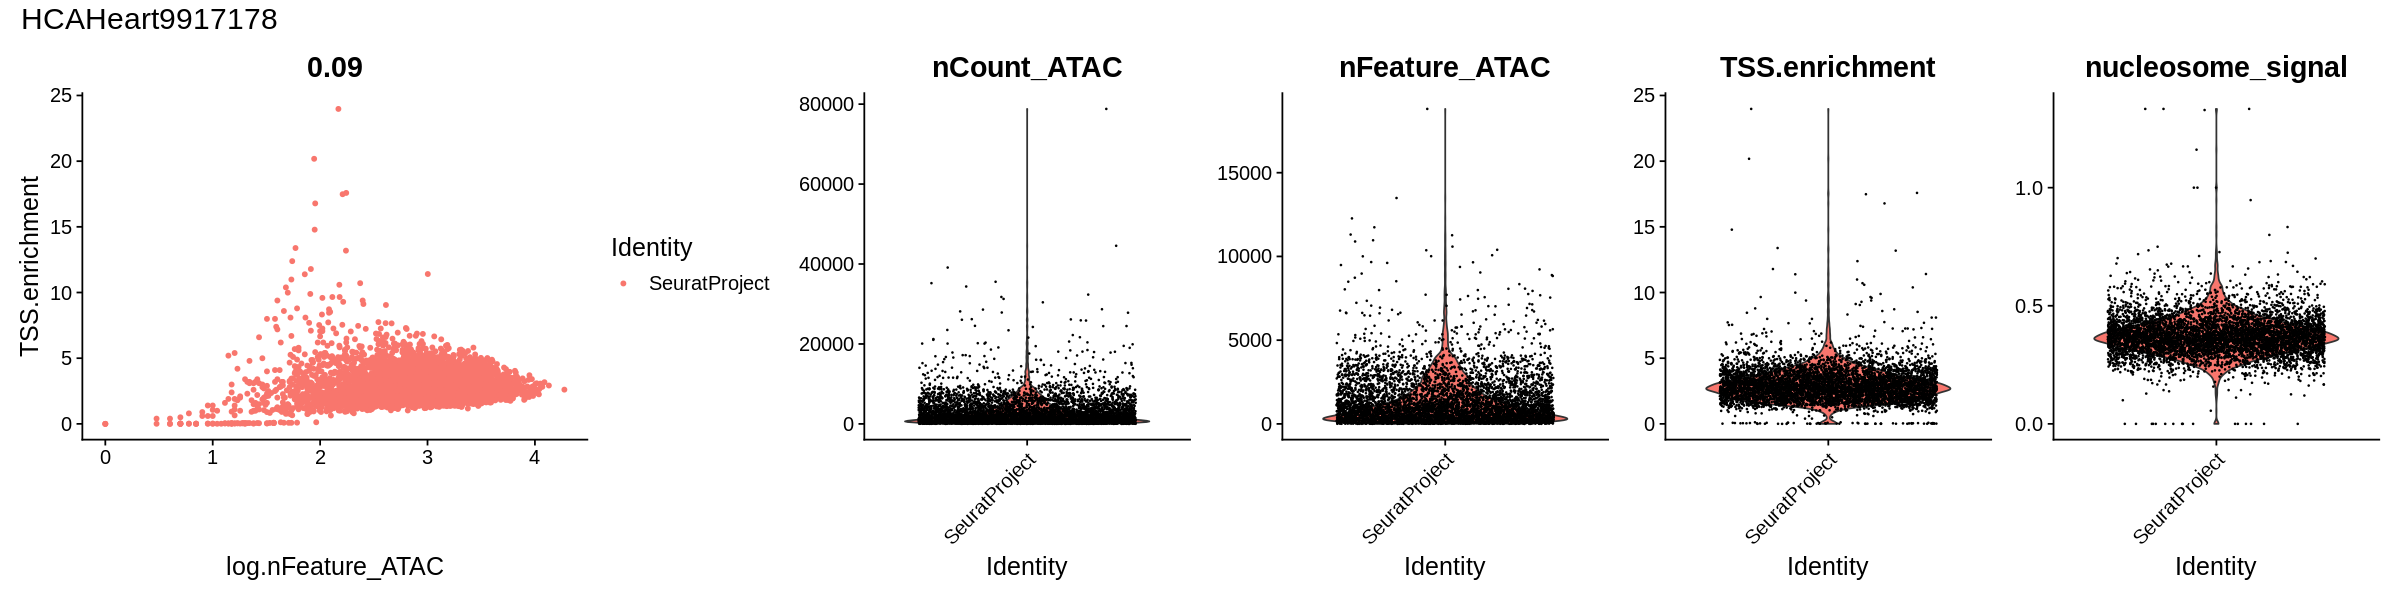

[1] "/nfs/team205/heart/mapped/cellranger-arc200/HCAHeartST10773166_HCAHeartST10781063"
[1] "HCAHeartST10773166_HCAHeartST10781063"


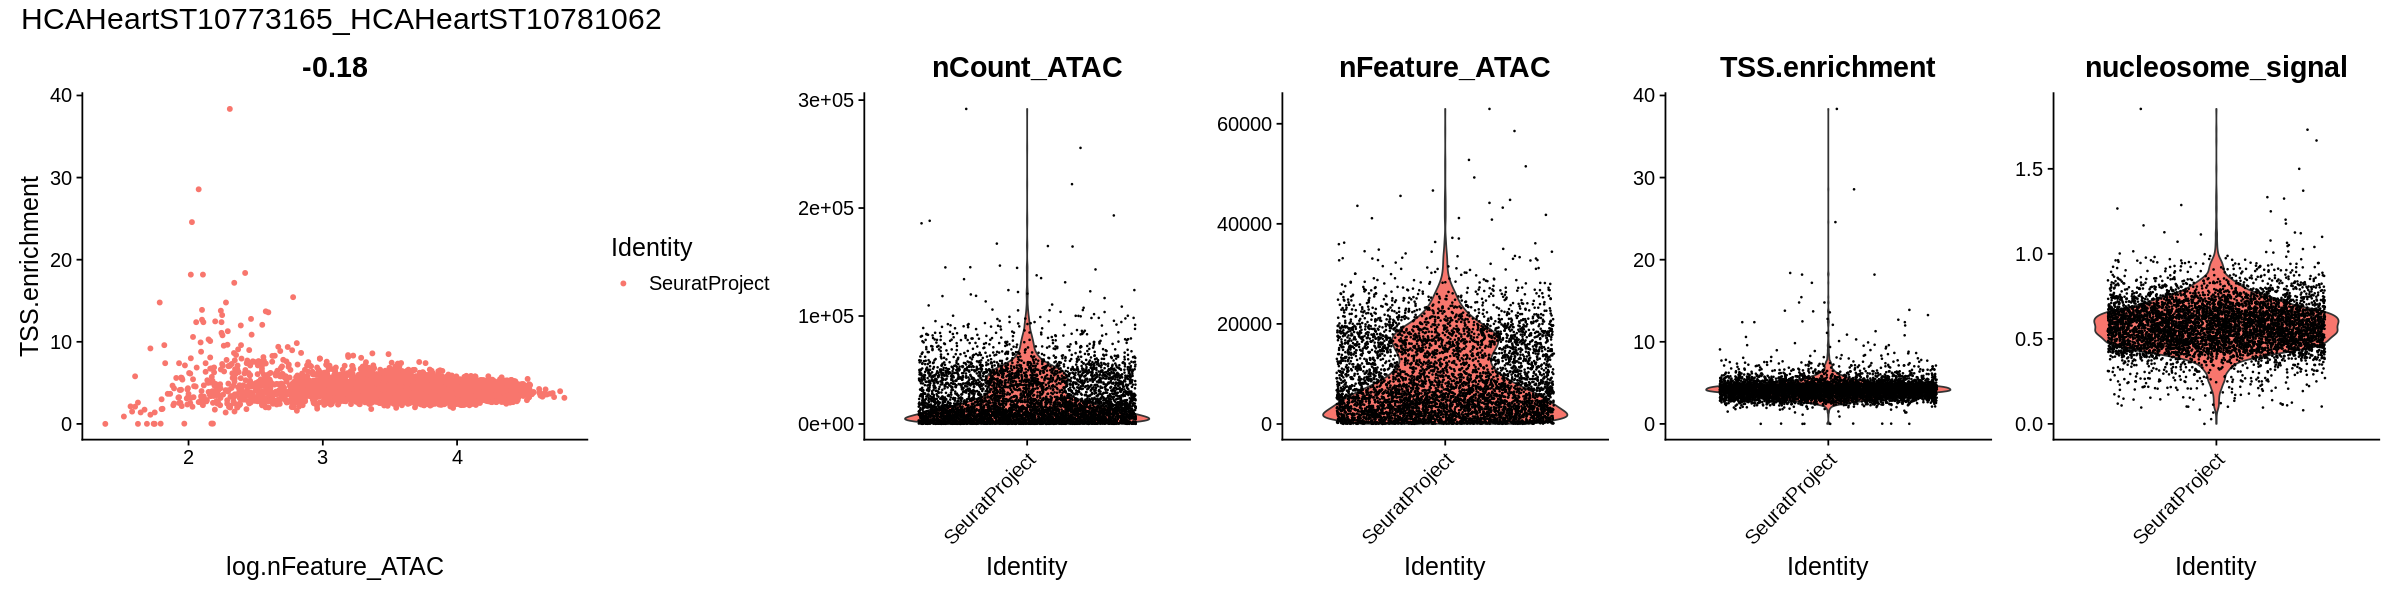

[1] "/nfs/team205/heart/mapped/cellranger-arc200/HCAHeartST10773167_HCAHeartST10781064"
[1] "HCAHeartST10773167_HCAHeartST10781064"


Warning message:
"Removed 1 rows containing non-finite values (stat_ydensity)."
Warning message:
"Removed 1 rows containing missing values (geom_point)."


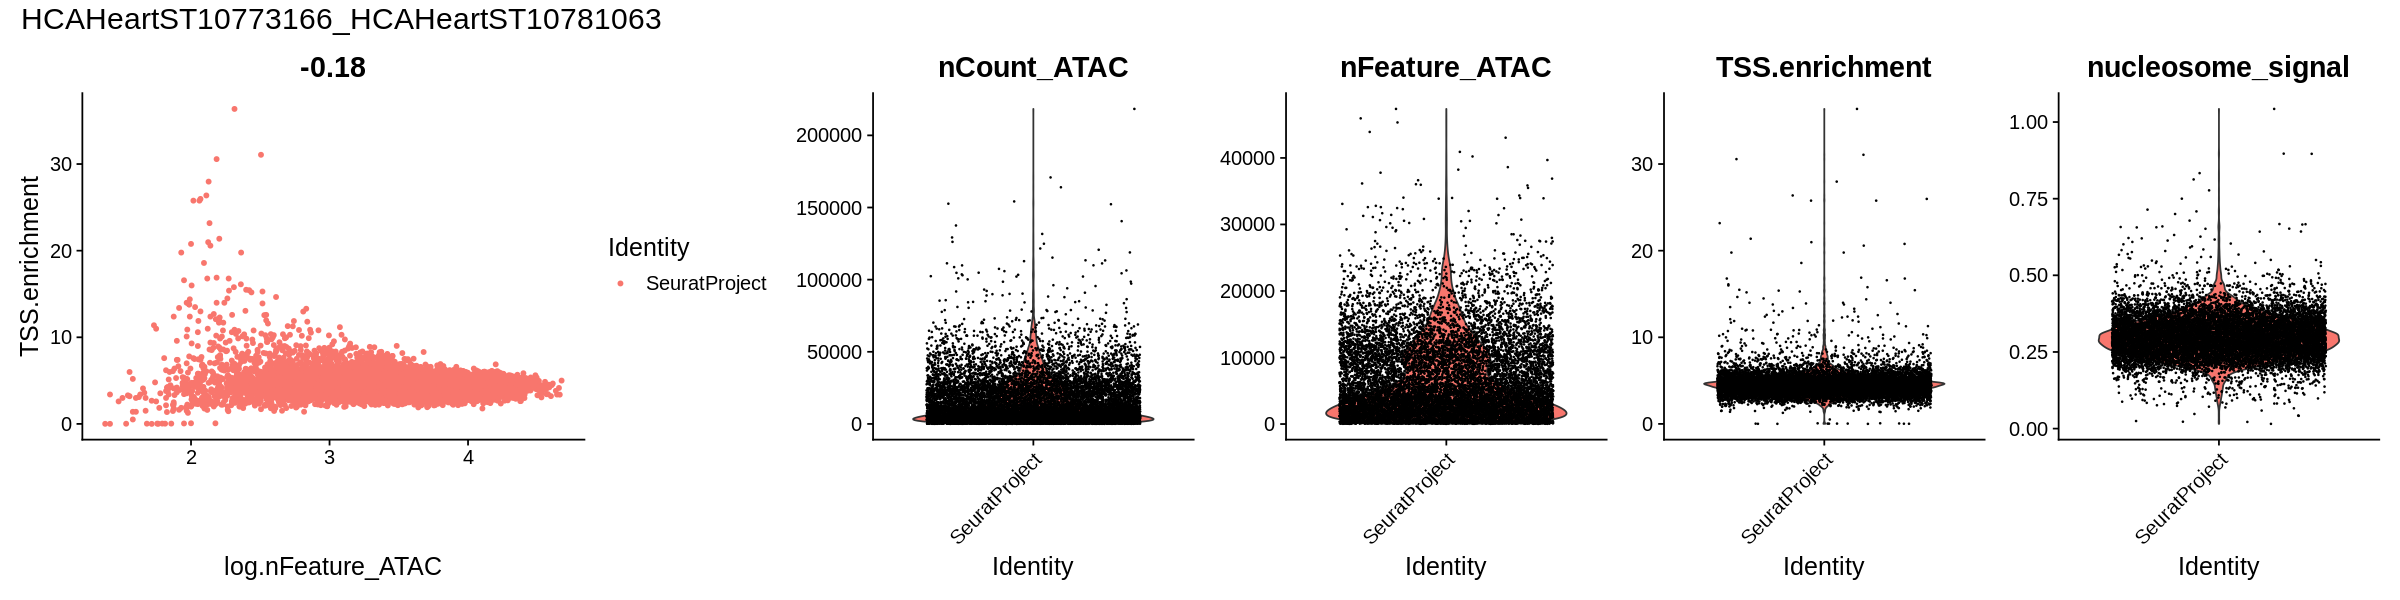

[1] "/nfs/team205/heart/mapped/cellranger-arc200/HCAHeartST10773168_HCAHeartST10781065"
[1] "HCAHeartST10773168_HCAHeartST10781065"


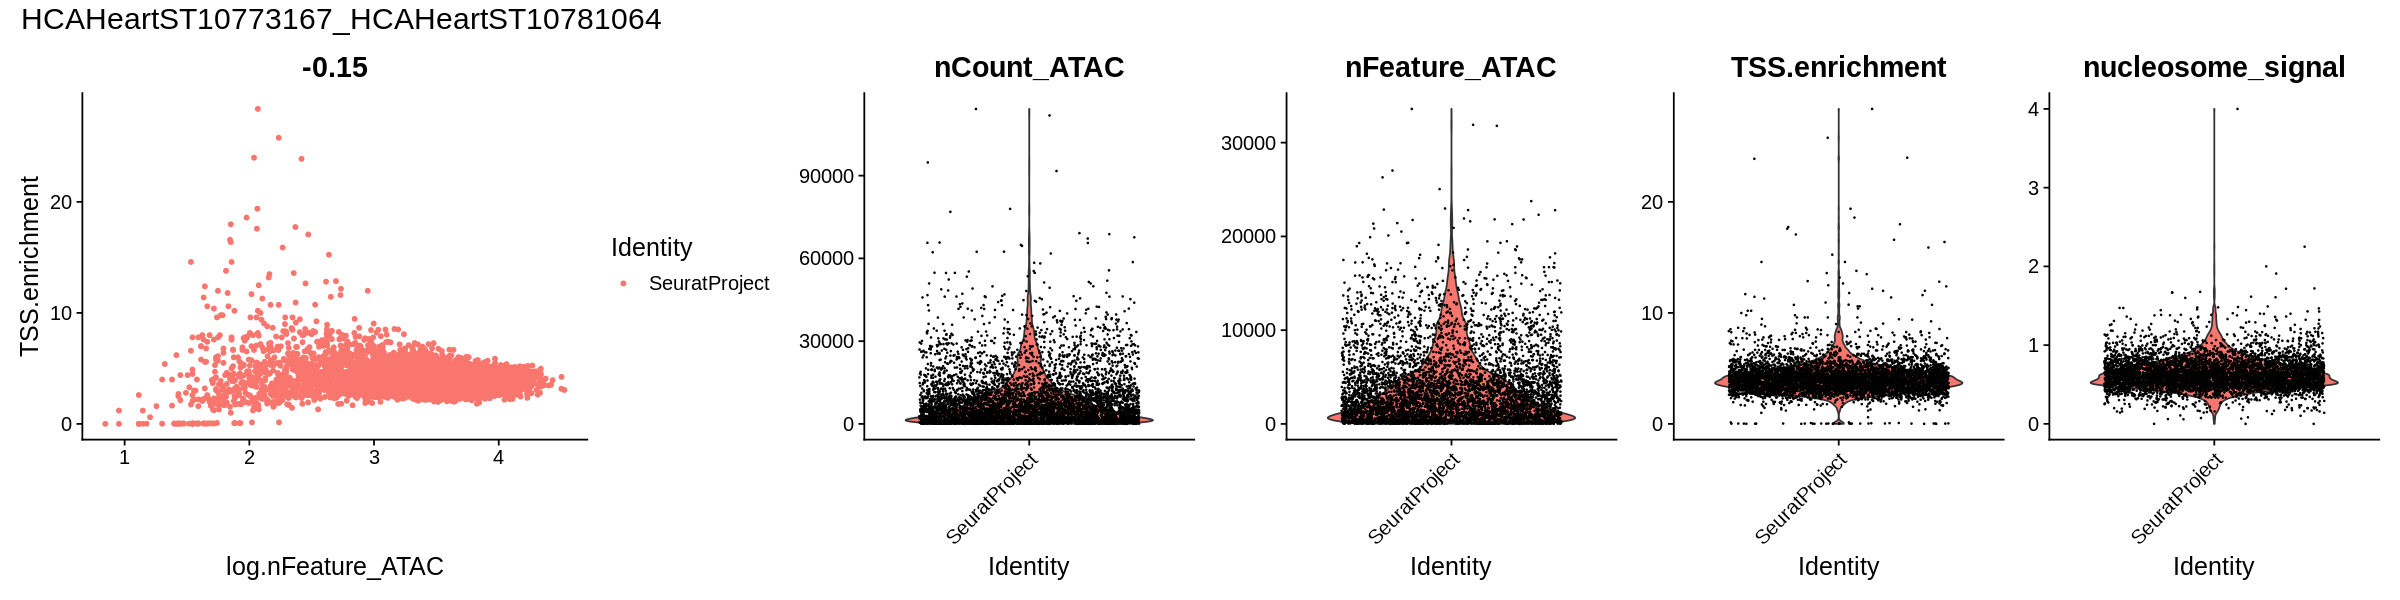

[1] "/nfs/team205/heart/mapped/cellranger-arc200/HCAHeartST10773169_HCAHeartST10781446"
[1] "HCAHeartST10773169_HCAHeartST10781446"


Warning message:
"Removed 4 rows containing non-finite values (stat_ydensity)."
Warning message:
"Removed 4 rows containing missing values (geom_point)."


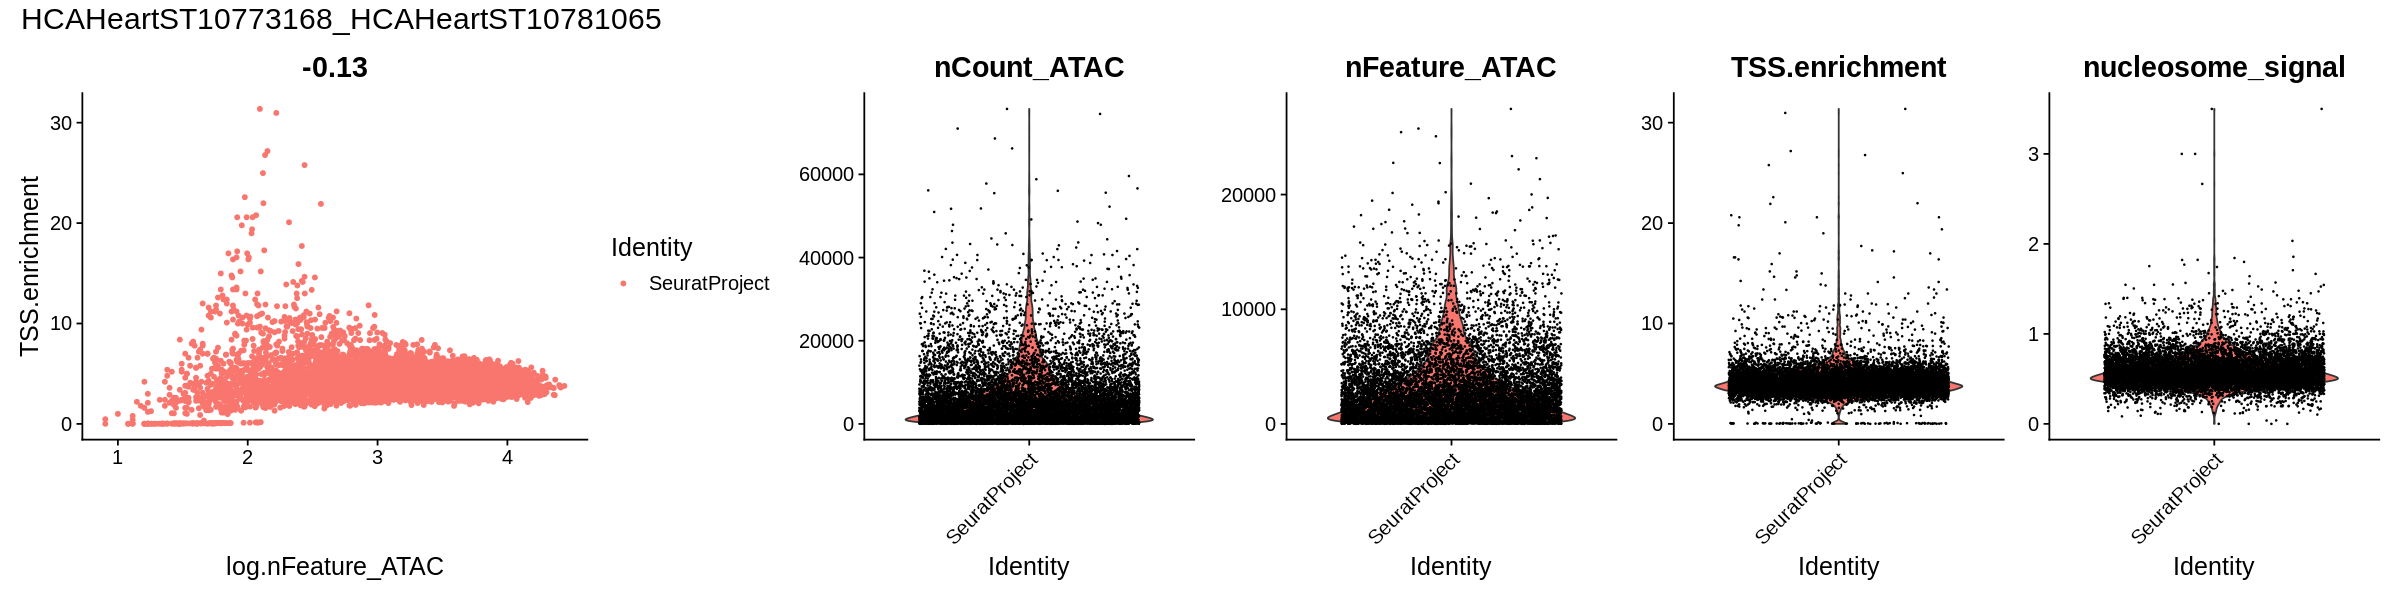

[1] "/nfs/team205/heart/mapped/cellranger-arc200/HCAHeartST10773170_HCAHeartST10781447"
[1] "HCAHeartST10773170_HCAHeartST10781447"


Warning message:
"Removed 4 rows containing non-finite values (stat_ydensity)."
Warning message:
"Removed 4 rows containing missing values (geom_point)."


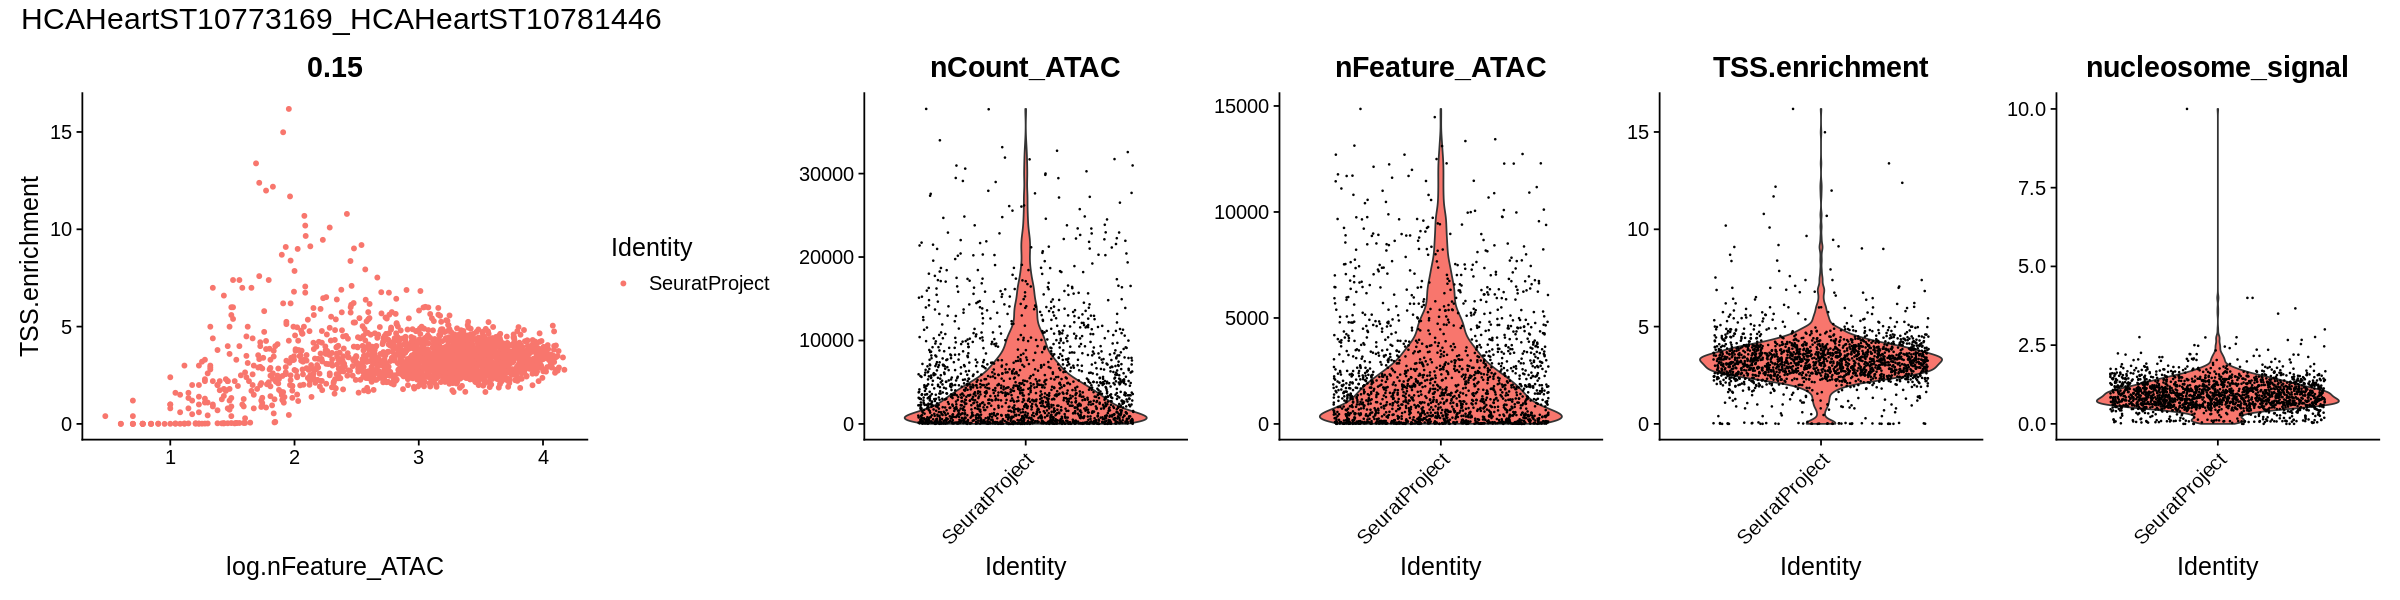

[1] "/nfs/team205/heart/mapped/cellranger-arc200/HCAHeartST10773171_HCAHeartST10781448"
[1] "HCAHeartST10773171_HCAHeartST10781448"


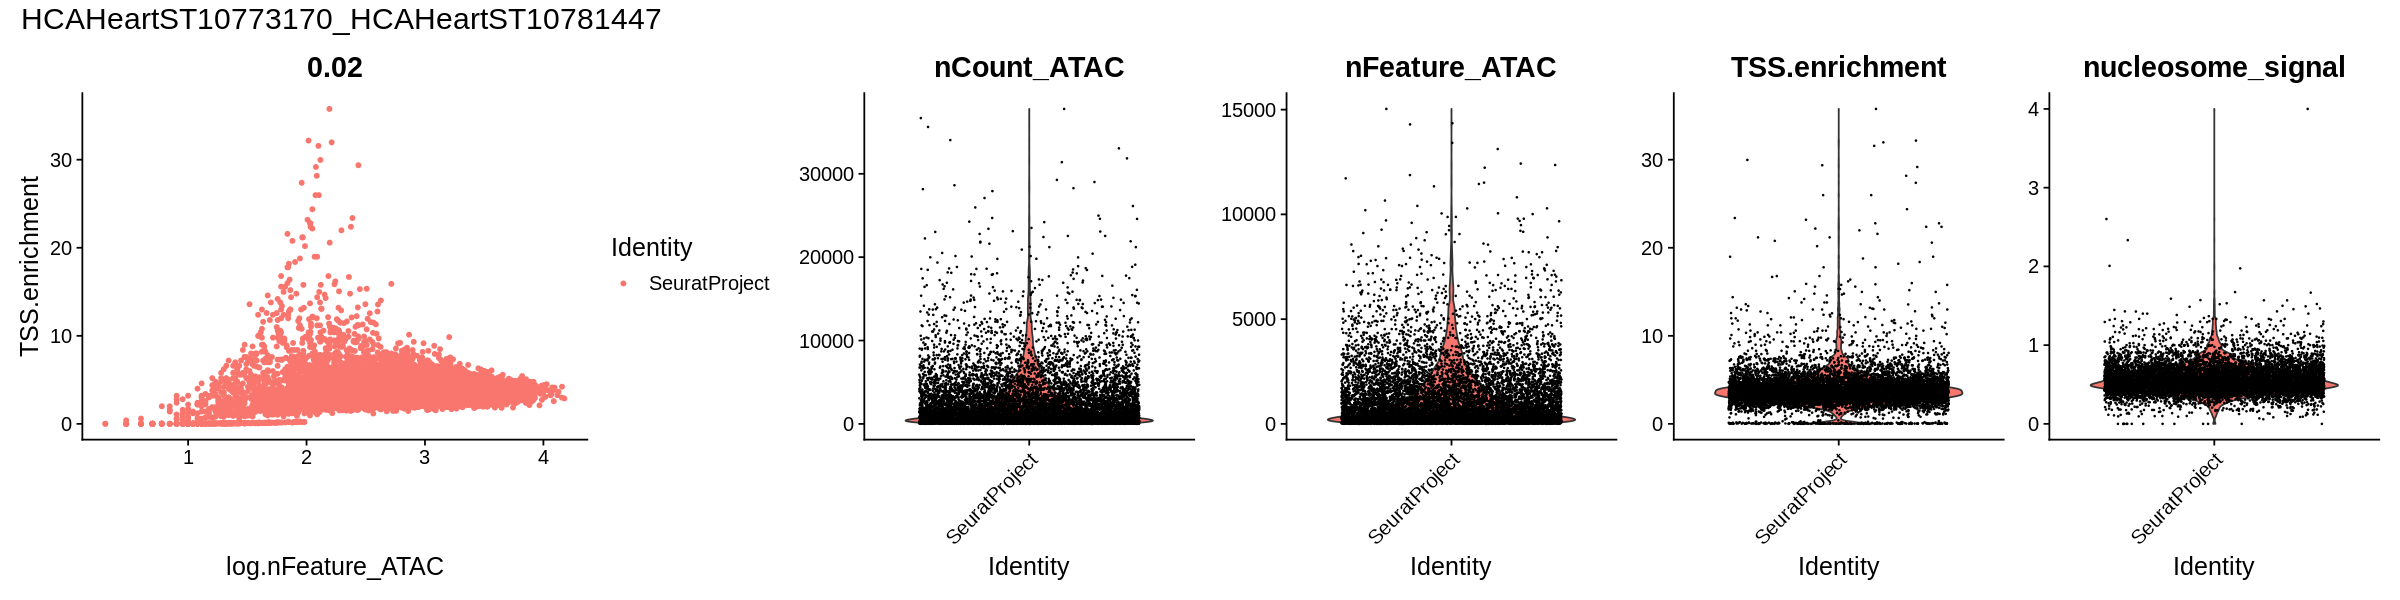

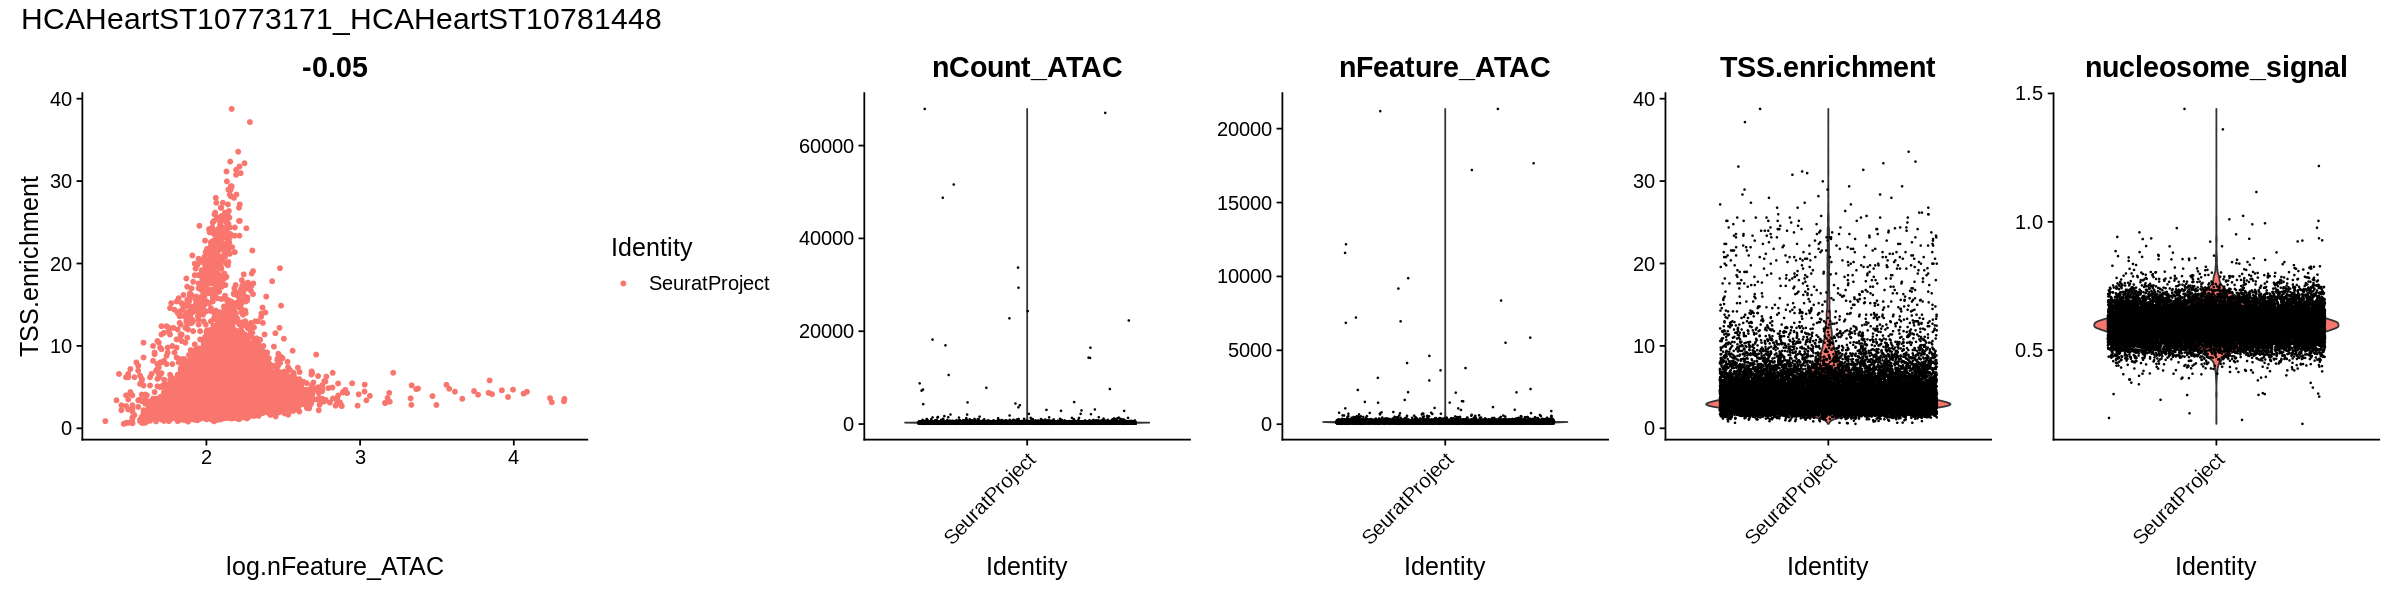

In [11]:
# SangerIDs = metadata %>% filter(Protocol=='ATAC') %>% pull(SangerID)

options(repr.plot.width = 20, repr.plot.height = 5)
for(id in 1:length(paths)){
    path = paths[id]
    ID = SangerIDs[id]
    
    print(path)
    print(ID)

    path_out = file.path(mainDir, ID)

#     so = readRDS(paste0(path2outs,ID,'/',ID,'_SeuratObj_QCed.RDS'))
    so = readRDS(paste0(path_out,'/',ID,'_SeuratObj_QCed_6reg_plus_SAN.RDS'))
    
    DefaultAssay(so) <- "ATAC"
    so@meta.data$log.nFeature_ATAC=log10(so@meta.data$nFeature_ATAC)
    
    p1 = FeatureScatter(object = so, feature1 = 'log.nFeature_ATAC', feature2 = 'TSS.enrichment')
    p2 = VlnPlot(
        object = so,
        features = c('nCount_ATAC','nFeature_ATAC','TSS.enrichment','nucleosome_signal'),
        pt.size = 0.1,
        ncol = 4
    )
    P = p1+p2+plot_layout(nrow = 1, widths = c(1, 3))+plot_annotation(title = ID)&theme(title = element_text(size=15))
    plot(P)
}

## Filter out low quality cells and obtain good quality cell ID

In [22]:
barcode=c()
for(id in 1:length(paths)){
    path = paths[id]
    ID = SangerIDs[id]
    
    print(path)
    print(ID)
    
    path_out = file.path(mainDir, ID)

#     so = readRDS(paste0(path,'/',ID,'_SeuratObj_QCed.RDS'))
    so = readRDS(paste0(path_out,'/',ID,'_SeuratObj_QCed_6reg_plus_SAN.RDS'))
    
    DefaultAssay(so) <- "ATAC"
    
    print(dim(so[["ATAC"]]))
    so = subset(
        x = so,
        subset = TSS.enrichment>2 &
            nucleosome_signal<2 &
            nCount_ATAC>100
    )
    print(dim(so[["ATAC"]]))

    if(grepl('cellranger-arc200', path)){
        ID <- unlist(strsplit(ID, "_"))[2]
    }
    print(ID)

    
    barcode=c(barcode, paste(ID, colnames(so[["ATAC"]]), sep='_'))
}

[1] "/nfs/team205/heart/mapped/cellranger-arc101/HCAHeart9508819"
[1] "HCAHeart9508819"
[1] 126052   3510
[1] 126052   3450
[1] "HCAHeart9508819"
[1] "/nfs/team205/heart/mapped/cellranger-arc101/HCAHeart9508820"
[1] "HCAHeart9508820"
[1] 47014 11684
[1] 47014 10513
[1] "HCAHeart9508820"
[1] "/nfs/team205/heart/mapped/cellranger-arc101/HCAHeart9508821"
[1] "HCAHeart9508821"
[1] 79543 10170
[1] 79543  9901
[1] "HCAHeart9508821"
[1] "/nfs/team205/heart/mapped/cellranger-arc101/HCAHeart9917173"
[1] "HCAHeart9917173"
[1] 34208  5740
[1] 34208  4845
[1] "HCAHeart9917173"
[1] "/nfs/team205/heart/mapped/cellranger-arc101/HCAHeart9917174"
[1] "HCAHeart9917174"
[1] 20819  2392
[1] 20819  1749
[1] "HCAHeart9917174"
[1] "/nfs/team205/heart/mapped/cellranger-arc101/HCAHeart9917175"
[1] "HCAHeart9917175"
[1] 46286  4560
[1] 46286  4040
[1] "HCAHeart9917175"
[1] "/nfs/team205/heart/mapped/cellranger-arc101/HCAHeart9917176"
[1] "HCAHeart9917176"
[1] 34804  5195
[1] 34804  4152
[1] "HCAHeart9917176"
[1

In [24]:
path

[1] "/nfs/team205/heart/mapped/cellranger-arc200/HCAHeartST10773171_HCAHeartST10781448"

In [23]:
print(grepl('cellranger-arc200', path))

[1] TRUE


In [25]:
san_barcodes <- c('GCCGTGAGTGTTTCAC-1', 'GACCTCAAGTGTTGCG-1', 'ATCAAGACAGGCAAGC-1',
             'CAATCTAAGAAACTGG-1', 'ATCACACAGGGATGAC-1', 'GCTGTGCAGGAACGCG-1',
             'GTAAGGTCAAAGGCCA-1', 'CGTTTGTGTACAATGT-1', 'AGTAACCTCCTCACAC-1',
             'GGCTAGACATTGTGAT-1', 'TGCTTGCTCAAGTGAG-1', 'TGGTTGAGTAGCCATA-1',
             'CCTTCGTAGGTACCGC-1', 'AGAACCGCAAGGATTA-1', 'CGCTCCATCCTGGTCT-1')

san_barcodes <- paste0('HCAHeartST10781447_', san_barcodes)

sum(san_barcodes %in% barcode)

[1] 12

In [26]:
length(barcode)

[1] 110638

In [27]:
# save the barcodes of good quality cells
# write.table(barcode, file = "/nfs/team205/kk18/data/mapped/cellranger-arc101/6reg-v2_MultiomeATAC_Signac-QCed-barcodes.txt", col.names = F, row.names = F)
write.table(barcode, file = file.path(mainDir, "6reg-v2_MultiomeATAC_Signac-QCed-barcodes.txt"), col.names = F, row.names = F)

In [28]:
sessionInfo()

R version 4.1.0 (2021-05-18)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Ubuntu 20.04.1 LTS

Matrix products: default
BLAS/LAPACK: /home/jovyan/my-conda-envs/r_env/lib/libopenblasp-r0.3.18.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats4    parallel  stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] patchwork_1.1.1                   forcats_0.5.1                    
 [3] stringr_1.4.0                     dplyr_1.0.7                      
 [5] purrr_0.3.4                       readr_2.1.0                      
 [7] tidyr_1.1.4                       tibble_3.1.6             